# Friezes

A *frieze* is an image that repeats itself along one direction. The name comes from architecture, where a frieze is a decoration running horizontally below a ceiling or roof. From M. Ascher, Ethnomathematics, p. 162.

<img src="attachment/Inca3.png" alt="Drawing" style="width: 270px;"/>
<img src="attachment/Inca4.png" alt="Drawing" style="width: 270px;"/>
<img src="attachment/Inca5.png" alt="Drawing" style="width: 270px;"/>


### Conway - Coxeter frieze (1970s)
A (type $A$) **frieze** is an array such that
* it is bounded above and below by a row of $1$s
* every diamond
$$
 \begin{array}{ccccccc}
 &b&\\[-1pt]
 a&&d\\[-1pt]
 &c&
\end{array}$$ satisfies the diamond rule $ad-bc=1$.

A **Conway - Coxeter frieze** consists of only *positive integers*

### Example (a Conway - Coxeter frieze)

\begin{equation*}
 \begin{array}{lcccccccccccccccccccccccc}
&&&1&&1&& 1&&1&&1&&1&&1&& \cdots\\[4pt]
\text{Row $2$}
&&\cdots&&\mathbf{{3}}&&\mathbf{1}&&\mathbf{2}&&\mathbf{2}&&\mathbf{1}&&3&&1&&
 \\[4pt]
&&&2&&2&&1&&3&&1&&2&&2&&\cdots&\
 \\[4pt]
&&\cdots&&1&&1&&1&&1&&1&&1&&1&&
\end{array}
\end{equation*}


In [4]:
% run attachment/friezedemo.py
friezepic = print_frieze(input_row=(1,2,2,3,1,2,4),width = 14, friezerow = 8)
view(friezepic)

The code produces a LaTeX source code which would produce the following picture
<img src="attachment/friezedemo.pdf" alt="Drawing" style="width: 470px;"/>


### Children practicing arithmetic

<img src="attachment/practice_frieze.pdf" alt="Drawing" style="width: 450px;"/>

### Children practicing arithmetic: Answer Key

<img src="attachment/practice_frieze_answerkey_table1.pdf" alt="Drawing" style="width: 270px;"/>
<img src="attachment/practice_frieze_answerkey_table2.pdf" alt="Drawing" style="width: 270px;"/>


### What do the numbers around the integers count?
<img src="attachment/figure3.pdf" alt="Drawing" style="width: 240px;"/>

The corresponding frieze is below.

<img src="attachment/friezedemo.pdf" alt="Drawing" style="width: 450px;"/>

Answer: the number of triangles adjacent to each vertex.

### Theorem (Conway and Coxeter, 1970s)
A Conway - Coxeter frieze with $n$ nontrivial rows $\large\longleftrightarrow$ a triangulation of an $(n+3)$-gon


Note: Hence Conway - Coxeter friezes are Catalan objects.


<br>
<br>

# Fomin - Zelevinsky Cluster Algebra (2001)

Let $Q$ be a **quiver** (a directed graph) on $n$ vertices with no loop and no 2-cycle.
E.g. Below is a quiver of affine Dynkin type $\widetilde{\mathbb{A}}_{1,2}$, which has 1 arrow pointing counterclockwise and  2 arrows pointing clockwise.

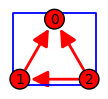

In [12]:
Q=ClusterQuiver([[1,0],[2,1],[2,0]])
Q.show(fig_size=0.1, circular=True)

* A **cluster algebra from $Q$** is a subalgebra $\mathcal{A}$ of the field of rational functions in $n$ variables. 
* The generators of $\mathcal{A}$ are called **cluster variables**, which are computed from $Q$ as we explain below.

**Note:** Python indexing starts at $0$, but our indexing starts at $1$.

In [6]:
A=ClusterAlgebra(Q)
A

A Cluster Algebra with cluster variables x0, x1, x2 and no coefficients over Integer Ring

### Initial Seed (cluster + quiver)

Start with an initial **cluster** (a set of **cluster variables**) of size n.

In [7]:
S=A.initial_seed()
S.cluster_variables()

[x0, x1, x2]

### Mutation
We can **mutate** a cluster at each of the vertices 1, 2, $\dots$, n.

In [8]:
S=A.initial_seed()
S.mutate(0)
S.cluster_variables()

[(x1*x2 + 1)/x0, x1, x2]

We get a new quiver by reversing all arrows adjacent to vertex $0$.

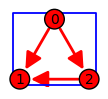

In [9]:
ClusterQuiver(S.b_matrix()).show(fig_size=0.1, circular=True)

### Mutating all clusters

Continue mutating all clusters at all vertices.

In [10]:
S=A.initial_seed()
S.mutate([0,1])
S.cluster_variables()

[(x1*x2 + 1)/x0, (x1*x2^2 + x0 + x2)/(x0*x1), x2]

### Theorem (Laurent Phenomenon and Positivity): 
Every cluster variable is a Laurent polynomial with positive coefficients in the initial cluster variables, that is, every cluster variable $x$ is
$$x=\frac{g(x_1,\dots,x_n)}{x_1^{d_1} \dots x_n^{d_n}}$$ where $g(x_1,\dots,x_n)\in \mathbb{Z}_{>0}[x_1,\dots,x_n]$, that is, a polynomial with positive coefficients. 

In [11]:
S=A.initial_seed()
S.mutate([0,1,2,0,1,2,1])
for x in S.cluster_variables():
    print(x)
    print('')

(x1^2*x2^4 + x0^3*x1 + x0^2*x1*x2 + 2*x0*x1*x2^2 + 2*x1*x2^3 + x0^2 + 2*x0*x2 + x2^2)/(x0^2*x1^2*x2)

(x0 + x2)/x1

(x1^3*x2^6 + x0^5*x1^2 + x0^4*x1^2*x2 + 2*x0^3*x1^2*x2^2 + 2*x0^2*x1^2*x2^3 + 3*x0*x1^2*x2^4 + 3*x1^2*x2^5 + 2*x0^4*x1 + 4*x0^3*x1*x2 + 5*x0^2*x1*x2^2 + 6*x0*x1*x2^3 + 3*x1*x2^4 + x0^3 + 3*x0^2*x2 + 3*x0*x2^2 + x2^3)/(x0^3*x1^3*x2^2)



### Frieze (over an integral domain)
In general, a **frieze** (of type $A$) is an array of elements of an *integral domain* $R$ such that
* it is bounded above and below by a row of $1$s
* every diamond

$$
 \begin{array}{ccccccc}
 &b&\\[-1pt]
 a&&d\\[-1pt]
 &c&
\end{array}
$$ 
satisfies the 
rule
$ad-bc=1$. 


### Example: a frieze over the cluster algebra
Note: I omit the rows of $1$s.

\begin{align*} 
&\hspace{10pt} x_3\hspace{10pt}  &&
 \frac{x_1x_3+1+x_2}{x_2x_3}  &&
 \frac{x_2+1}{x_1} &&
 \hspace{10pt} x_1
 \hspace{10pt} \\
\hspace{5pt} x_2\hspace{5pt}  &&
 \frac{x_1x_3+1}{x_2}  &&
\hspace{-5pt} \hspace{-5pt} \frac{x_2^2+2x_2+1+x_1x_3}{x_1x_2x_3}\hspace{-5pt}\hspace{-5pt}  &&
 \hspace{5pt} x_2\hspace{5pt}   &&
\\
& \hspace{10pt} x_1  &&
  \frac{x_1x_3+1+x_2}{x_1x_2}  &&
  \frac{x_2+1}{x_3}  &&
 \hspace{10pt}  x_3
\end{align*}



#### Friezes over the integers 
Specializing $x_1=x_2=x_3=1$ gives a Conway - Coxeter (positive integer) frieze 

\begin{equation*}
\begin{array}{lcccccccccccccccccccccccc}
& 1  &&
3  &&
2  &&
1  &&
\\
1  &&
2  &&
5  &&
1  &&
 \\
& 1 &&
3 &&
2 &&
1 &&
\end{array}
\end{equation*}


Specializing $x_1=x_2=1$ and $x_3=-1$ gives

\begin{equation*}
\begin{array}{lcccccccccccccccccccccccc}
& -1  &&
-1 &&
2  &&
1  &&
\\
1  &&
0  &&
-3  &&
1  &&
 \\
&
1 &&
1 &&
-2 &&
-1 &&
\end{array}
\end{equation*}



#### Frieze over the Gaussian integers $\mathbb{Z}[i]$

Specializing $x_1=1$, $x_2=i$, and $x_3=i$ gives


\begin{equation*}
\begin{array}{lcccccccccccccccccccccccc}
& \hspace{5pt} i \hspace{5pt}  &&
 \hspace{-5pt}-1-2i \hspace{-5pt}  &&
1+i  &&
 \hspace{5pt}1  \hspace{5pt} &&
\\
i  &&
1-i  &&
-3i  &&
i  &&
 \\
&
1 &&
2-i &&
1-i &&
i &&
\\
 1 &&
1 &&
1 &&
1 &&
\end{array}
\end{equation*}


#### Frieze over the quadratic integer ring $\mathbb{Z}\left[\sqrt{-3}\right]$
Specializing $x_1=1$, $x_2=\frac{1+\sqrt{-3}}{2}$, $x_3=1$ gives

\begin{equation*}
\begin{array}{lcccccccccccccccccccccccc}
& 1  &&
\scriptstyle 2-\sqrt{-3}  &&
\frac{3+\sqrt{-3}}{2}  &&
1  &&
\\
\frac{1+\sqrt{-3}}{2}  &&
\scriptstyle 1-\sqrt{-3}  &&
\frac{7-\sqrt{-3}}{2}  &&
\frac{1+\sqrt{-3}}{2}  &&
 \\ 
& 1  &&
\scriptstyle 2-\sqrt{-3}  &&
\frac{3+\sqrt{-3}}{2}  &&
1  &&
\end{array}
\end{equation*}


# References
### Websites:
* [Wikipedia entry](https://en.wikipedia.org/wiki/Cluster_algebra)
* [Cluster Algebras Portal](http://www.math.lsa.umich.edu/~fomin/cluster.html)

### arXiv.org:
* [Introductory cluster algebra survey by Lauren Williams titled *Cluster algebras: an introduction*](https://arxiv.org/abs/1212.6263)
* [Cluster algebra textbook by Sergey Fomin, Lauren Williams, Andrei Zelevinsky titled *Introduction to cluster algebras*](https://arxiv.org/abs/1608.05735)
* [Frieze survey by Sophie Morier-Genoud titled *Coxeter's frieze patterns at the crossroads of algebra, geometry and combinatorics*](https://arxiv.org/abs/1503.05049)
* [Frieze paper by Emily Gunawan and Ralf Schiffler titled *Frieze vectors and unitary friezes*](https://arxiv.org/abs/1806.00940)
